# [IAS 150] Migration Data Notebook

Estimated Time: 2 Hours

Today we will be examining a data set that the UN produces that explores the migrant stock and population of countries.

### Table of Contents 
0 - [Basics](#0) <br>
1 - [Picking a Variable](#1)<br>
2 - [Graphing the Data](#2)<br>
3 - [Comparing to Another Country](#3)<br>
4 - [Over Time](#4)<br>
5 - [Questions](#5)<br>

# Context

***Ideas from IAS and map***

# Basics <a id='0'></a>

This webpage is a Jupyter notebook. We have created this specific notebook so that you can run code that we wrote in order to perform data analysis and answer questions. Cells are the boxes of text that all you to populate the notebook with code or text. To edit a cell, double click it. In order to run a cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top.

In [1]:
#Just run this cell
#It imports the necessary tools for the code to function
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
%matplotlib inline
import math as m
import qgrid as q
import pandas as pd
import sys
sys.path.insert(0, "development")
import grapher as grapher

Here's the data. You can scroll horizontally when the table is selected to see the whole data set.

In [2]:
# Run this cell to display the dataset
data = Table().from_df(pd.read_csv("development/migrant_table_final_appended.csv").drop(columns=["Unnamed: 0"])).sort("Country")
data

Code,Country,Year,Migration Type,Total Migration,Gender,Country 1,Country 1 Count,Country 2,Country 2 Count,Country 3,Country 3 Count,Country 4,Country 4 Count,Country 5,Country 5 Count,Migrants Under 15 years old,Migrants 20-29 years old,Migrants 30-39 years old,Migrants 40-49 years old,Migrants 50 years old and older,Admits asylum migrants?,Has migrate to countries abroad as refugees/asylum-seekers?,War or Genocide?,Government instability?,Organized crime?,Economic recession?,Financial crisis?,GDP in 1990,GDP in 1995,GDP in 2000,GDP in 2005,GDP in 2010,GDP in 2017,Natural disasters?,Man-made disasters?,Passport power rating,Changes over-time in access to visas?
4,Afghanistan,1990,Emigration,3.66155e+06,female,Iran (Islamic Republic of),1.7883e+06,Pakistan,1.6731e+06,Saudi Arabia,110590,Germany,21242,United States of America,15757,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1990,Emigration,3.06313e+06,male,Pakistan,1.60357e+06,Iran (Islamic Republic of),1.33567e+06,Saudi Arabia,55665,United States of America,12687,Germany,12037,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1990,Emigration,6.72468e+06,total,Pakistan,3.27667e+06,Iran (Islamic Republic of),3.12397e+06,Saudi Arabia,166255,Germany,33279,United States of America,28444,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1990,Immigration,32558,female,Tajikistan,22879,Pakistan,4576,Uzbekistan,1144,Afghanistan,0,Papua New Guinea,0,5207,2559,6541,5138,2749,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1990,Immigration,25128,male,Tajikistan,17658,Pakistan,3531,Uzbekistan,883,Afghanistan,0,Papua New Guinea,0,6786,2811,7103,6784,4293,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1990,Immigration,57686,total,Tajikistan,40537,Pakistan,8107,Uzbekistan,2027,Afghanistan,0,Papua New Guinea,0,11993,5370,13644,11922,7042,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1995,Emigration,2.04074e+06,female,Iran (Islamic Republic of),1.18606e+06,Pakistan,620083,Saudi Arabia,113637,Germany,29287,United States of America,20837,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1995,Emigration,1.58484e+06,male,Iran (Islamic Republic of),843379,Pakistan,592489,Saudi Arabia,56751,Germany,22250,United States of America,16475,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1995,Emigration,3.62557e+06,total,Iran (Islamic Republic of),2.02944e+06,Pakistan,1.21257e+06,Saudi Arabia,170388,Germany,51537,United States of America,37312,nan,nan,nan,nan,nan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes
4,Afghanistan,1995,Immigration,39105,female,Tajikistan,20733,Pakistan,9722,Uzbekistan,1036,Afghanistan,0,Papua New Guinea,0,6601,3169,8008,6630,3959,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3622,3236,3542,6167,15325,19544,Yes,Yes,92,Yes


Here are all the countries in the table!

In [3]:
# Run this cell to display the countries
countries = data.group("Country").show(20)
countries

Country,count
Afghanistan,42
China,42
Cuba,42
El Salvador,42
Ethiopia,42
Ghana,42
Guatemala,42
Honduras,42
India,42
Iraq,42


Now, let's learn how to do a few basic functions on tables to get answers about the data set.

#### The `where` function

The `where` function can be used on a data set to find *where* the data meets the condition you set for it. A function is what follows the `.` and is used to manipulate data. The `where` function takes in two parameters, a name of a column and a condition or value to match the data to. Below, let's use the where function to show only data for your country.

In [4]:
# Replace the elipsis with your country name. DO NOT REMOVE THE QUOTES!
# Then, run the cell.
my_country = "Cuba"
country_data = data.where("Country", my_country)
country_data.show(1)

Code,Country,Year,Migration Type,Total Migration,Gender,Country 1,Country 1 Count,Country 2,Country 2 Count,Country 3,Country 3 Count,Country 4,Country 4 Count,Country 5,Country 5 Count,Migrants Under 15 years old,Migrants 20-29 years old,Migrants 30-39 years old,Migrants 40-49 years old,Migrants 50 years old and older,Admits asylum migrants?,Has migrate to countries abroad as refugees/asylum-seekers?,War or Genocide?,Government instability?,Organized crime?,Economic recession?,Financial crisis?,GDP in 1990,GDP in 1995,GDP in 2000,GDP in 2005,GDP in 2010,GDP in 2017,Natural disasters?,Man-made disasters?,Passport power rating,Changes over-time in access to visas?
192,Cuba,1990,Emigration,399117,female,United States of America,351002,Puerto Rico,9510,Spain,9264,Venezuela (Bolivarian Republic of),5874,Dominican Republic,3900,nan,nan,nan,nan,nan,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes


It looks like this table is too long and doesn't give us a lot of information. Let's call the `where` function again. However, let's use it so that we will only look at **immigration of men** into your country.

In [6]:
# Replace each elipsis in line with the above description. 
# DO NOT REMOVE THE QUOTES!
# Then, run the cell.
migration_type = "Immigration"
gender = "male"
immigration_data = country_data.where("Migration Type", migration_type)
male_immigration_data = immigration_data.where("Gender", gender)
male_immigration_data

Code,Country,Year,Migration Type,Total Migration,Gender,Country 1,Country 1 Count,Country 2,Country 2 Count,Country 3,Country 3 Count,Country 4,Country 4 Count,Country 5,Country 5 Count,Migrants Under 15 years old,Migrants 20-29 years old,Migrants 30-39 years old,Migrants 40-49 years old,Migrants 50 years old and older,Admits asylum migrants?,Has migrate to countries abroad as refugees/asylum-seekers?,War or Genocide?,Government instability?,Organized crime?,Economic recession?,Financial crisis?,GDP in 1990,GDP in 1995,GDP in 2000,GDP in 2005,GDP in 2010,GDP in 2017,Natural disasters?,Man-made disasters?,Passport power rating,Changes over-time in access to visas?
192,Cuba,1990,Immigration,17277,male,Spain,5309,Russian Federation,2763,Ukraine,907,United States of America,609,Haiti,585,790,226,665,796,1096,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,1995,Immigration,13628,male,Spain,4190,Russian Federation,2181,Ukraine,716,United States of America,481,Haiti,462,705,341,626,727,870,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,2000,Immigration,9978,male,Spain,3071,Russian Federation,1598,Ukraine,525,United States of America,352,Haiti,339,642,493,619,690,663,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,2005,Immigration,9483,male,Spain,3040,Russian Federation,1582,Ukraine,519,United States of America,349,Haiti,335,675,472,1283,912,828,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,2010,Immigration,8207,male,Spain,2758,Russian Federation,1436,Ukraine,471,United States of America,317,Haiti,304,572,282,1093,994,788,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,2015,Immigration,7386,male,Spain,2482,Russian Federation,1292,Ukraine,424,United States of America,285,Haiti,274,474,295,875,1065,738,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes
192,Cuba,2017,Immigration,7275,male,Spain,2444,Russian Federation,1272,Ukraine,417,United States of America,280,Haiti,269,478,276,880,1062,767,No,Yes,Yes,Yes,Yes,Yes,Yes,28650,30430,30570,42640,64330,96851,Yes,Yes,61,Yes


Now, we have a table that we can analyze! Let's do some visualizations.

#### Visualizing Data

##### Bar Graph

Let's create a bar graph of the total male immigration for each year for your country. 

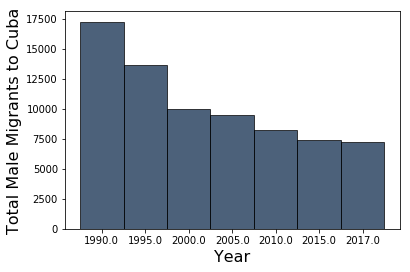

In [7]:
# Run this cell.
male_immigration_data.bar("Year", "Total Migration")
plots.ylabel("Total Male Migrants to " + my_country);

The `bar` function is used to create bar charts like the one above. It takes in the names of two columns in quotes with the first one on the x-axis and the second one on the y-axis.

##### Line Graph

Let's create a line graph of the total male immigration from the country of origin of most of the migrants over time.

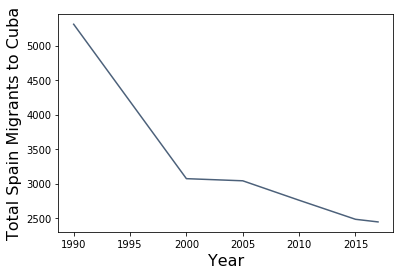

In [8]:
# Run this cell.
male_immigration_data.plot("Year", "Country 1 Count")
plots.ylabel("Total " + male_immigration_data.column("Country 1").item(0) + " Migrants to " + my_country);

The `plot` function is used to create line graphs like the one above. It takes in the names of two columns in quotes with the first one on the x-axis and the second one on the y-axis.

Now, you can try a visualization! We will provide code for you to fill in, but try calling the `where` function to focus your data and one of the two visualizations to get a better look at your data. We will also put one more example below.

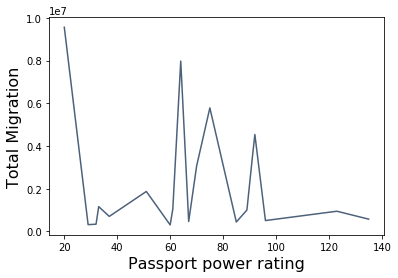

In [9]:
# Run this to see an example visualization!
# This is a line graph for the year 2000 
# where the x-axis is the Passport power rating of a country and
# the y-axis is the Total Migration out of the country
table_y2k = data.where("Year", 2000).where('Gender', 'total').where('Migration Type','Emigration')
table_y2k.plot("Passport power rating", "Total Migration")

In [ ]:
table_to_visualize = data #call .where on data thrice for the best results
table_to_visualize #call either .bar or .plot depending of your data

Congratulations! You have learned the basics of data science programming! For the next part, we wrote some higher functions that essentially do the same things you just learned with some plotting magic.

# Picking Your Variables <a id='1'></a>

For this section, you will be selecting your country for the graph. Please type your country's name in the provided space below.

In [10]:
# Replace the elipsis with your country name. DO NOT REMOVE THE QUOTES!
# Then, run the cell.
my_country = "Cuba"

Next, you will be able to pick a variable to investigate for your country. The options are listed for you below: 
1. Gender
2. Migration Type
3. Age (Immigration Only)
Our personal favorite is 3 :)

In [11]:
# Replace the elipsis with the number of the variable 
# that you would like to explore. No need for quotes.
# Then, run the cell.
my_variable = 3

# Graphing the Data  <a id='2'></a>

Now, let's graph the data for your variables! Run the cell below.

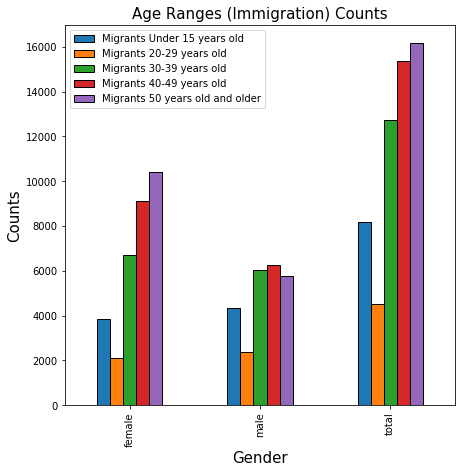

In [18]:
grapher.one_pick_and_graph(my_country, 3, year=False)

# Comparing to Another Country  <a id='3'></a>

Now that we have looked at a graph for your country, let's compare to another country. For this section, you will be selecting your country and we will visualize a specific gender and migration type. Please type your country's name in the provided space below.

In [28]:
# Replace the elipsis with another country name. DO NOT REMOVE THE QUOTES!
# Then, run the cell.
another_country = "El Salvador"
gender = "total" # female, male, or total
migration_type = "Immigration" # Immigration or Emigration
graph_type = "bar" # line or bar

Now, let's compare! Run the cell below.

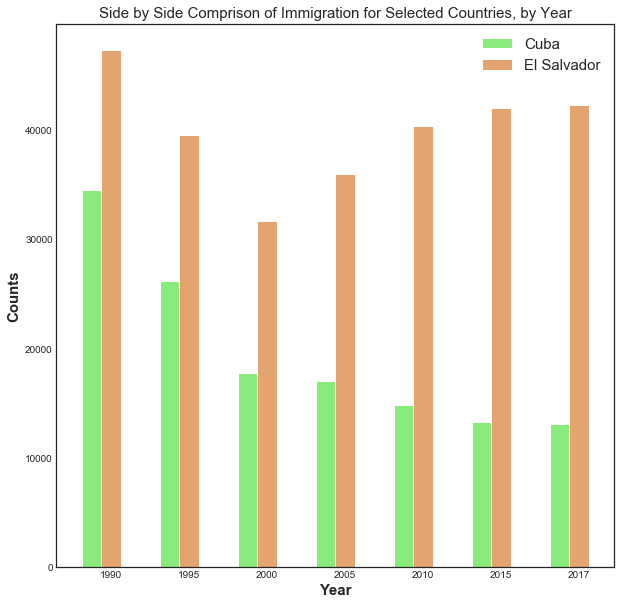

In [29]:
grapher.multiple_pick_and_graph(data.to_df(), 'Gender', gender, migration_type, [my_country, another_country], graph_type)

# Over Time  <a id='4'></a>

Now, we can look at these changes over time. Run the cell below.

No handles with labels found to put in legend.


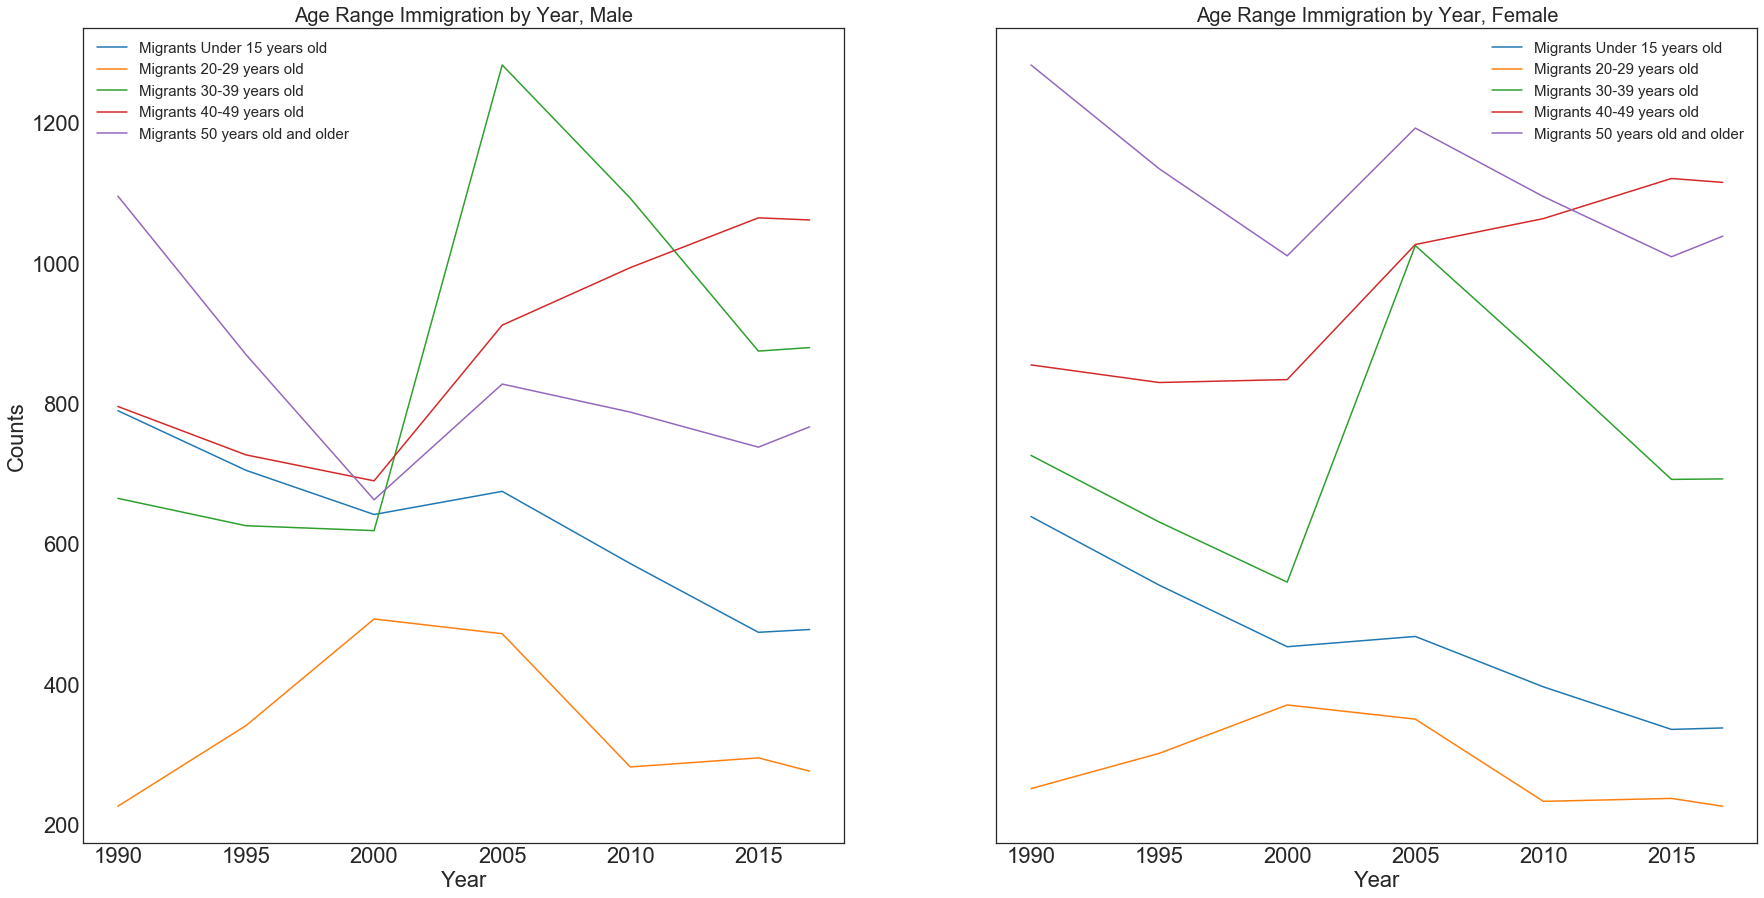

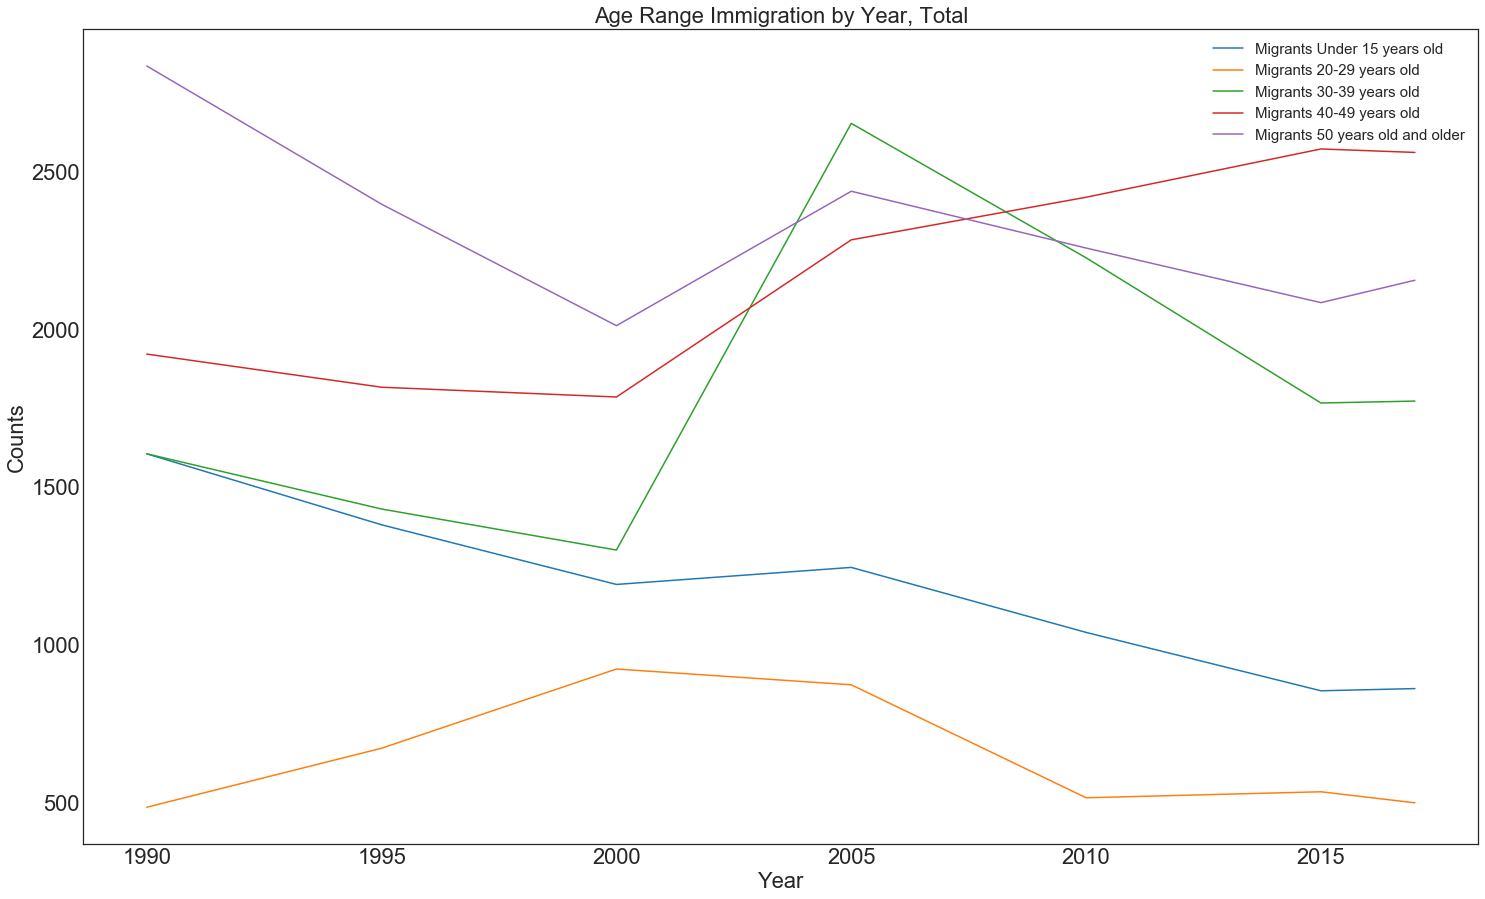

In [21]:
grapher.one_pick_and_graph(my_country, my_variable, year=True)

No handles with labels found to put in legend.


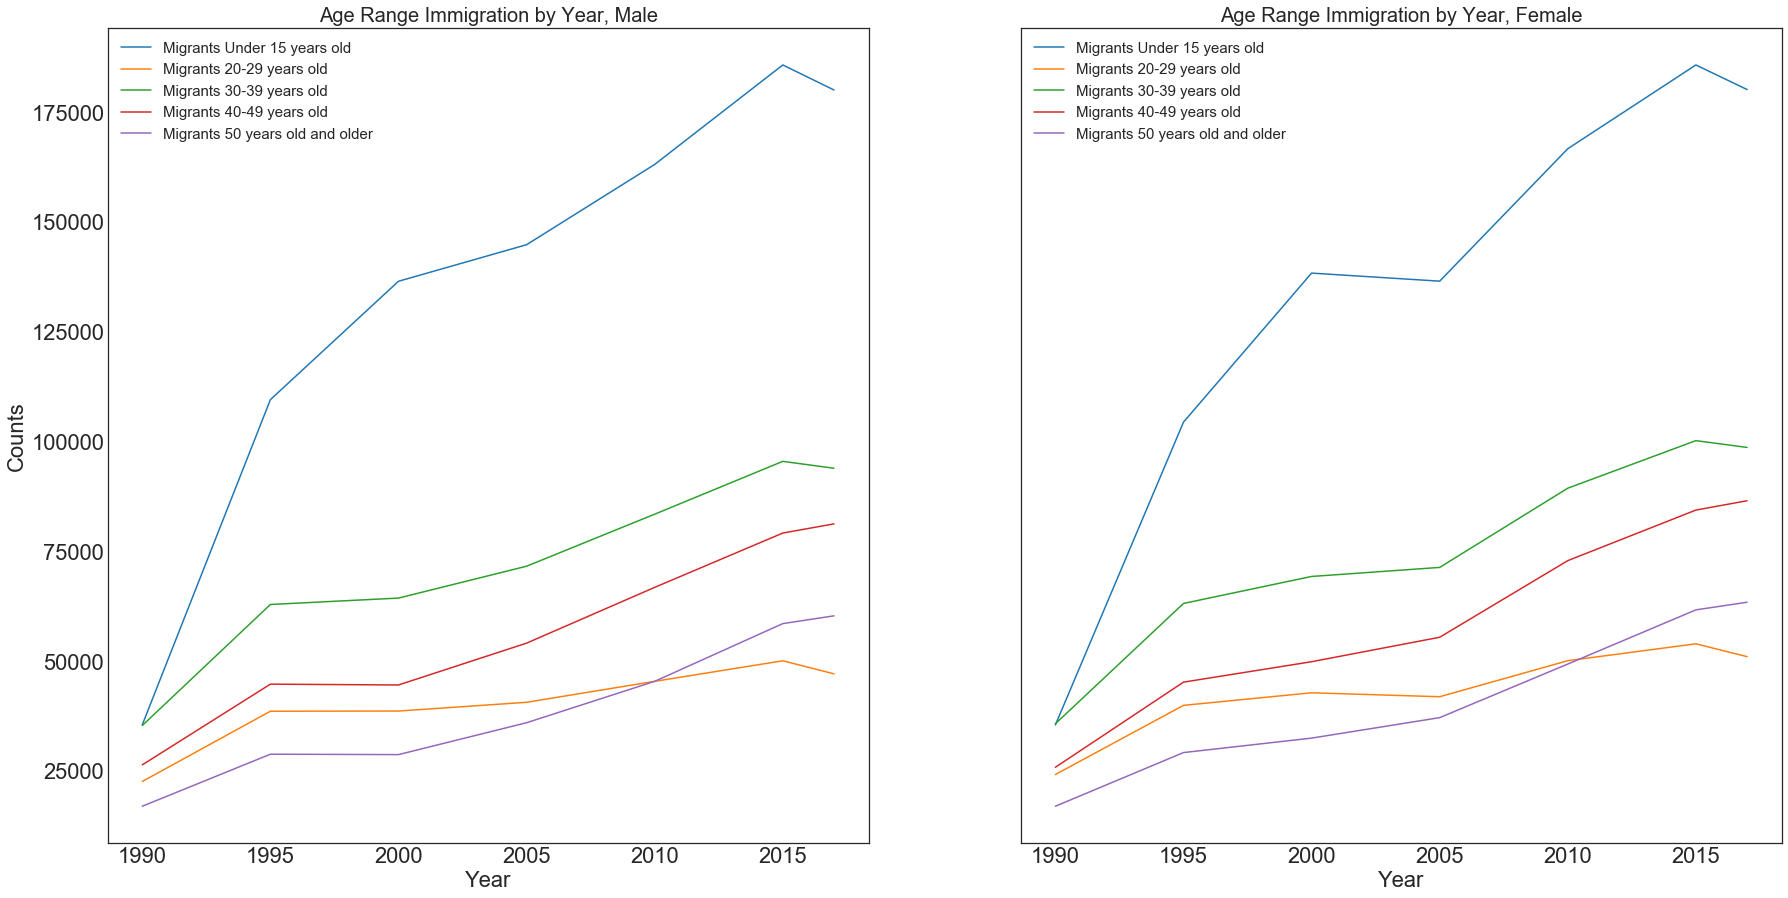

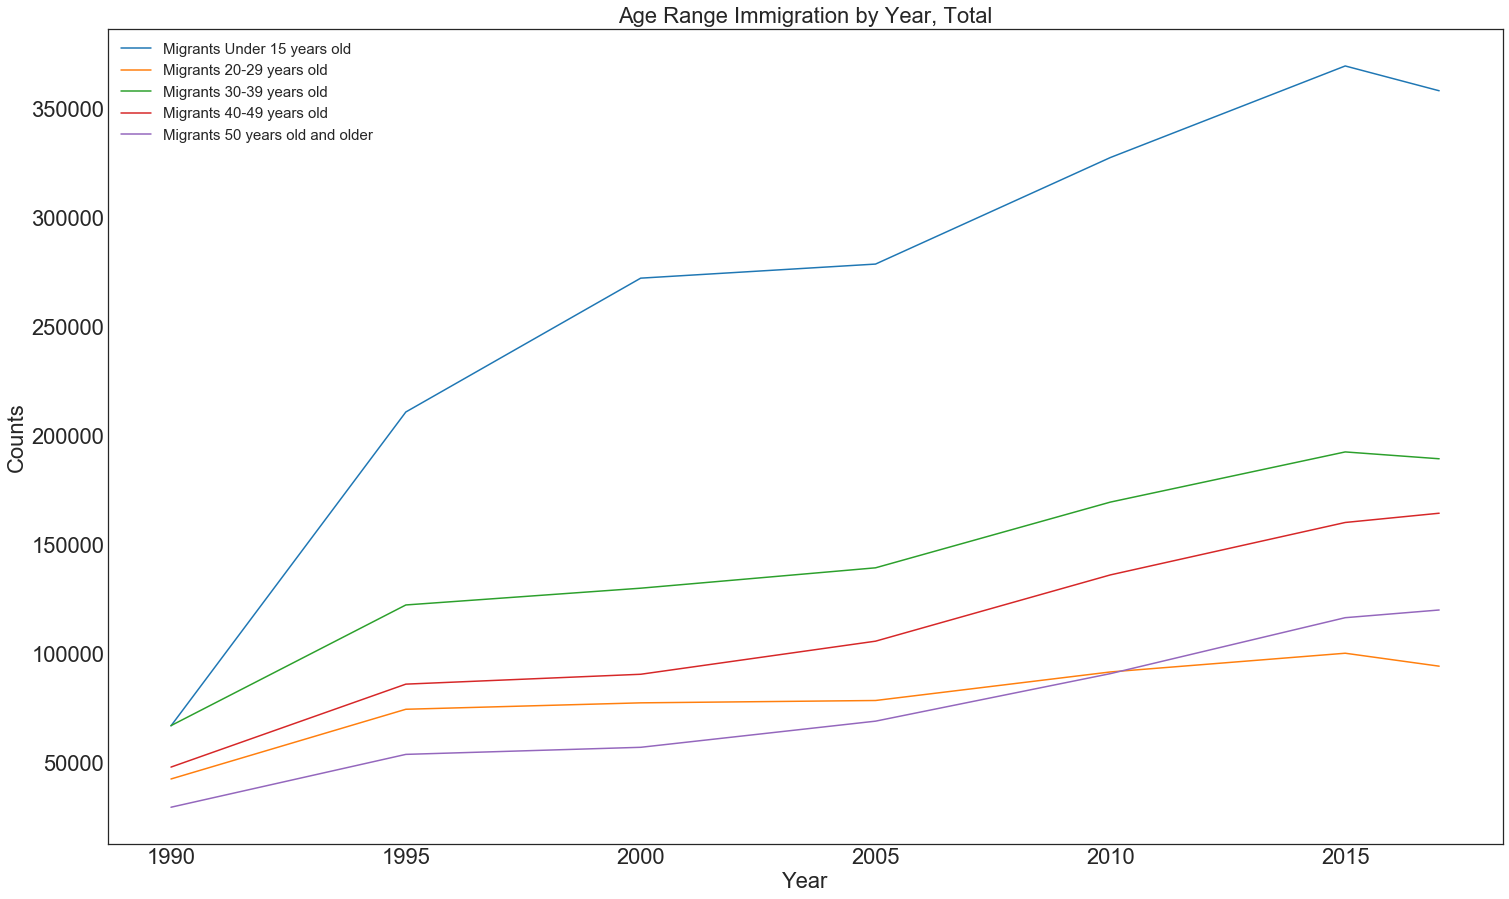

In [22]:
grapher.one_pick_and_graph(another_country, my_variable, year=True)

# Questions  <a id='5'></a>

To replace the text with your answer, double click the text.

1. Does your assigned country admit asylum migrants?
If yes, describe if there has been a pattern or time period for asylum migration to your country.
If no, explain why not.

***Replace this with your answer to Q1***

2. Do individuals from your assigned country migrate to countries abroad as refugees/asylum-seekers (yes or no)? Explain why or why not.


***Replace this with your answer to Q2***

3. Has your country suffered from war? If so, what years and how many times?

***Replace this with your answer to Q3***

4. Has your country suffered from genocide? If so, what years and how many times?

***Replace this with your answer to Q4***

5. Has your country suffered from an unstable government like coups or dictatorship? If so, what years and how many times?

***Replace this with your answer to Q5***

6. Has your country suffered from organized crim like like military control, cartels, gangs, or other rebellious groups? If so, what years and how many times?

***Replace this with your answer to Q6***

7. If you answered yes for any question from Q3 to Q6, describe at least one of those political conflicts in detail.

***Replace this with your answer to Q7***

8. Has your country suffered from economic downturns like economic recession or financial crisis? If so, what type? What years? How many times? Also, describe at least one in detail.

***Replace this with your answer to Q8***

9. Has your country suffered from natural disasters? If so, what type? What years? How many times?

***Replace this with your answer to Q9***

10. Has your country suffered from any man-made disasters? If so, what type? What years? How many times?

***Replace this with your answer to Q10***

11. Have there been changes over-time for your assigned country’s access to visas? Explain. 

***Replace this with your answer to Q11***